# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


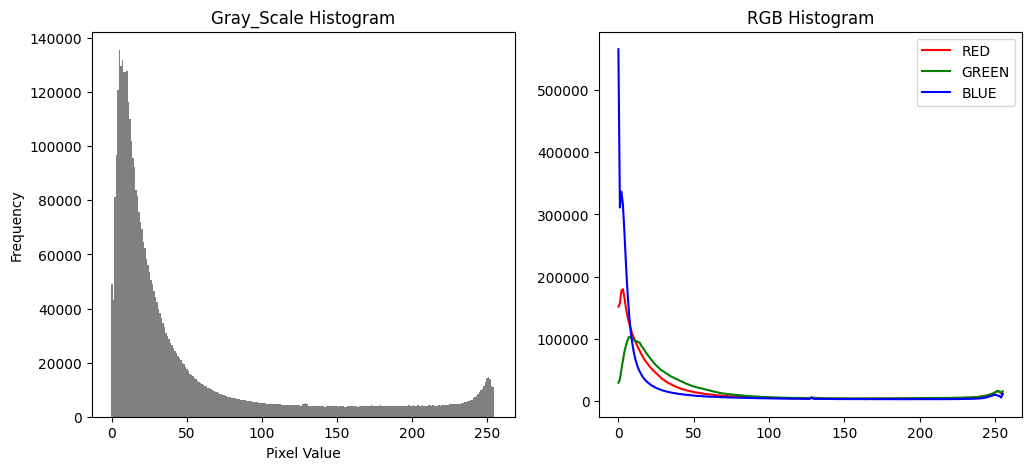

In [22]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_bgr = cv2.imread("/content/nature.png")

#convert bgr to rgb

img_rgb = img_bgr[:,:,::-1]

#manual conversion in gray_scale

r,g,b = img_rgb[:,:,0],img_rgb[:,:,1],img_rgb[:,:,2]
img_gray = (0.2989*r + 0.587*g + 0.114*b).astype(np.uint8)

## setup complete (image load)

def gray_histogram(gray_img):

  counts = np.zeros(256,dtype=int)
  flat_img = gray_img.ravel() # in this line we flatten 2D array to 1D

  for i in range(256):
    counts[i] = np.sum(flat_img == i) # here we find where pixel value equals i and  count them

  return counts


#1 Compute Gray_Scale Histogram
hist_gray = gray_histogram(img_gray)

#2 Compute RGB Histogram
hist_r = gray_histogram(img_rgb[...,0])
hist_g = gray_histogram(img_rgb[...,1])
hist_b = gray_histogram(img_rgb[...,2])

#ploating
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(range(256),hist_gray,color='gray',width = 1)
plt.title("Gray_Scale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(1,2,2)

plt.plot(hist_r,color='red',label = 'RED')
plt.plot(hist_g , color = 'green',label = 'GREEN')
plt.plot(hist_b , color = 'blue',label = 'BLUE')
plt.title("RGB Histogram")
plt.legend()
plt.show()



## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

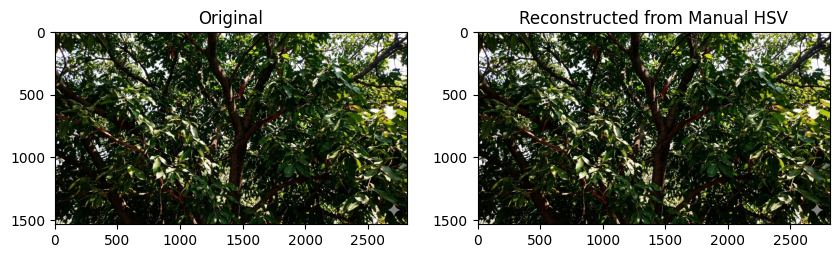

In [23]:
# PART B: RGB to HSV (Manual Implementation)

def rgb_to_hsv(img_rgb):

    #convert to float for math & normalize to 0-1 range
    img = img_rgb.astype(np.float32)/255.0

    #getting max and min values per pixel across channels
    #axis 2 is the color channel axis
    cmax = np.max(img,axis=2)
    cmin = np.min(img,axis=2)

    delta = cmax-cmin

    # Now Initialize H, S, V arrays with zeros
    h = np.zeros_like(cmax)
    s = np.zeros_like(cmax)
    v = cmax # here  Value is simply the maximum component

    # Calculate Saturation (S)
    # S = 0 if Cmax = 0, else delta / Cmax
    # We use np.where to handle division by zero safely
    non_zero_cmax = cmax > 0
    s[non_zero_cmax] = delta[non_zero_cmax] / cmax[non_zero_cmax]

    # Calculate Hue (H)
    # We need masks to know which channel was the max
    # Add a tiny epsilon to delta to avoid division by zero errors where delta=0
    delta_safe = delta.copy()
    delta_safe[delta == 0] = 1


    # Red is max
    idx = (img[:,:,0] == cmax)
    h[idx] = 60 * (((img[idx,1] - img[idx,2]) / delta_safe[idx]) % 6)

    # Green is max
    idx = (img[:,:,1] == cmax)
    h[idx] = 60 * (((img[idx,2] - img[idx,0]) / delta_safe[idx]) + 2)

    # Blue is max
    idx = (img[:,:,2] == cmax)
    h[idx] = 60 * (((img[idx,0] - img[idx,1]) / delta_safe[idx]) + 4)

    # Handle undefined Hue (where delta = 0), set to 0
    h[delta == 0] = 0


    # Handle negative hues
    h[h < 0] += 360

    # --- Scale to OpenCV format ---
    # H: 0-360 -> 0-179 (so we divide by 2)
    # S: 0-1 -> 0-255
    # V: 0-1 -> 0-255
    h_final = (h / 2).astype(np.uint8)
    s_final = (s * 255).astype(np.uint8)
    v_final = (v * 255).astype(np.uint8)

    # Merge back into a 3-channel image
    return cv2.merge([h_final, s_final, v_final])

# Run conversion
img_hsv_manual = rgb_to_hsv(img_rgb)

# Test by converting back to RGB using OpenCV (as requested to verify)
img_reconstructed = cv2.cvtColor(img_hsv_manual, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(img_reconstructed); plt.title("Reconstructed from Manual HSV")
plt.show()






## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

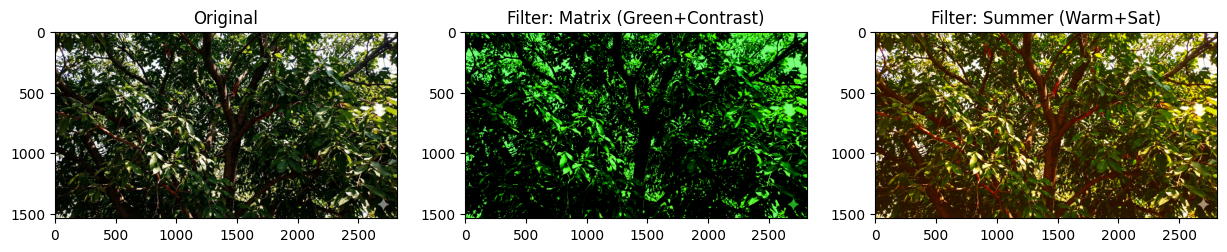

In [24]:
# PART C: Creating Filters

# Helper: Adjust Saturation manually
def adjust_saturation(img, factor):
    # Convert to float
    img = img.astype(float)
    # Convert to grayscale to get luminance
    gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    # Expand gray to 3 channels
    gray_3c = np.stack([gray, gray, gray], axis=2)
    # Linear Interpolation: New = Gray + factor * (Color - Gray)
    result = gray_3c + factor * (img - gray_3c)
    return np.clip(result, 0, 255).astype(np.uint8)

# Helper: Adjust Contrast manually
def adjust_contrast(img, factor):
    img = img.astype(float)
    mean = 128.0
    result = mean + factor * (img - mean)
    return np.clip(result, 0, 255).astype(np.uint8)


# filter 1 : "The Matrix" (Cyberpunk Green)
def filter_matrix(img_rgb):

    # 1. Channel Mixing
    res = img_rgb.astype(float)
    res[:,:,0] = res[:,:,0] * 0.5  # Suppress Red
    res[:,:,1] = res[:,:,1] * 1.2  # Boost Green
    res[:,:,2] = res[:,:,2] * 0.5  # Suppress Blue
    res = np.clip(res, 0, 255).astype(np.uint8)

    # 2. Contrast Boost
    res = adjust_contrast(res, 1.5)

    return res


# --- FILTER 2: "Summer Vibe" (Warm & Saturated) ---
def filter_summer(img_rgb):

    res = img_rgb.astype(float)

    # 1. Warm Tint (Add values to Red and Green channels)
    res[:,:,0] += 30 # Add Red
    res[:,:,1] += 15 # Add Green (Red+Green=Yellow)
    res = np.clip(res, 0, 255).astype(np.uint8)

    # 2. Saturation Boost
    res = adjust_saturation(res, 1.8)

    return res

  # Apply Filters
output_matrix = filter_matrix(img_rgb)
output_summer = filter_summer(img_rgb)

# Display Part C
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(output_matrix); plt.title("Filter: Matrix (Green+Contrast)")
plt.subplot(1, 3, 3); plt.imshow(output_summer); plt.title("Filter: Summer (Warm+Sat)")
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

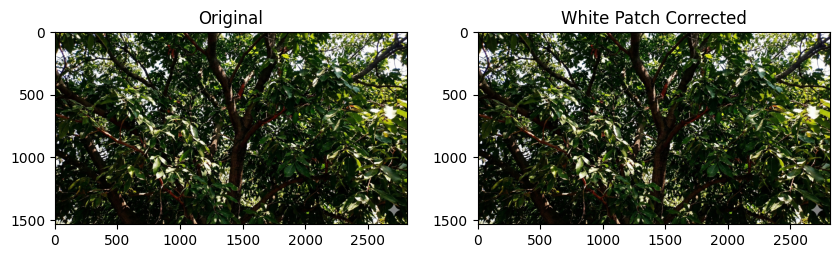

In [25]:
# PART D: White Balance (White Patch Method)

def white_patch_balance(img_input):

    img_float = img_input.astype(float)

    # 1. Find max value per channel
    max_vals = np.max(img_float, axis=(0, 1))

    # 2. Calculate scale factors (255 / max)
    scale_factors = 255.0 / max_vals

    # 3. Apply scaling
    balanced_img = img_float * scale_factors

    return np.clip(balanced_img, 0, 255).astype(np.uint8)

# Apply Part D
img_balanced = white_patch_balance(img_rgb)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 2, 2); plt.imshow(img_balanced); plt.title("White Patch Corrected")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

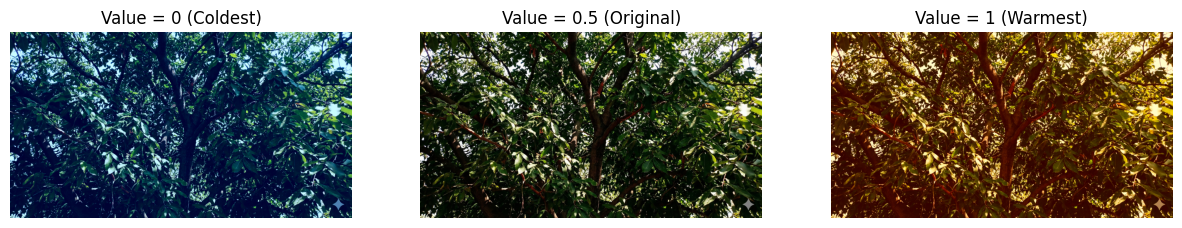

In [26]:
# PART E: White Balance Slider Function


def white_balance(img_rgb, value):
    # 1. Convert to float to perform math without overflow
    img = img_rgb.astype(float)

    # 2. Normalize the value from [0, 1] to [-1, 1]
    # -1.0 = Max Cold, 0.0 = Neutral, +1.0 = Max Warm
    shift = (value - 0.5) * 2

    # 3. Define Strength factors
    # We want to boost one channel and reduce the other.
    # 30-40 intensity shift is usually a good visual range.
    # You can experiment with this 'strength' variable.
    strength = 50

    # Create a copy of channels to modify
    r = img[:, :, 0]
    b = img[:, :, 2]

    if shift > 0:
        #WARMER (Shift is positive)
        # Boost Red, Reduce Blue
        r = r + (shift * strength)
        b = b - (shift * strength)

    else:
        #  COLDER (Shift is negative)
        # Boost Blue (subtracting a negative adds), Reduce Red (adding a negative subtracts)
        # Note: Since 'shift' is negative, adding it reduces R, subtracting it increases B.
        r = r + (shift * strength)
        b = b - (shift * strength)

    # 4. Apply back to image
    img[:, :, 0] = r
    img[:, :, 2] = b

    # 5. Clip values to stay within valid [0, 255] range and convert back to uint8
    img = np.clip(img, 0, 255).astype(np.uint8)

    return img

# Display Results (Static)


img_cold = white_balance(img_rgb, 0.0)   # Coldest
img_orig = white_balance(img_rgb, 0.5)   # Original
img_warm = white_balance(img_rgb, 1.0)   # Warmest

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_cold)
plt.title("Value = 0 (Coldest)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_orig)
plt.title("Value = 0.5 (Original)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_warm)
plt.title("Value = 1 (Warmest)")
plt.axis('off')

plt.show()

